# Supportive Functions I wrote

In [2]:
#summary: FUNCTION TO MAKE SURE FOLDERS ARE CORRECT - MEANING THAT INPUT FOLDER EXISTS AND OUTPUT FOLDER WILL BE CREATED IF NOT
def checkFolders(InputFolder,OutputFolder):
    # # get the current working directory to add to OutputFolder
    # current_working_directory = os.getcwd()
    # OutputFolder =  current_working_directory + OutputFolder
    # print input & output to the console
    print(f"Input Folder\t:{InputFolder}")
    print(f"Output Folder\t:{OutputFolder}")
   
    #---------------------------------------------#
    #CHECK IF DIRECTORIES ARE VALIED OR NOT
    from pathlib import Path
    data_path = Path(InputFolder)
    image_folder_project = Path(OutputFolder)
    
    #check if image folder exists or not on your pc
    if data_path.is_dir():
        print(f"INPUT Directory exists:\t{data_path} ")
    else:
        print(f"-----\nINPUT Directory doesn't exists on PC folder:\t{data_path}\nCan't find files!\n-----\n ")
    
    #check if image folder exists or not in Python project
    if image_folder_project.is_dir():
        print(f"OUTPUT Directory exists in project folder:\t{image_folder_project} ")
    else:
        print(f"-----\nOUTPUT Directory doesn't exists in project folder:\t{image_folder_project}\nCreating New folder in project folder\n-----")
        image_folder_project.mkdir(parents=True,exist_ok=True)

In [3]:
#summary: PRINT TO VERIFY AMOUNT OF FILES IN IMPORTED FOLDERS
def scanDir(dir_path):
    import os
    # Define the widths for each field
    dirname_width = 10
    filename_width = 6
    dirpath_width = 75
    #tabs of data to print so its easier to reformat
    _dirname  =      f"{'Subfolders':<{dirname_width}} | "
    _filename =      f"{'Files':<{filename_width}} | "
    _dirpath  =      f"{'Path':<{dirpath_width}} | "
    
    # Print the header
    print(f"{_dirname}{_filename}{_dirpath}")
    
    #THIS NEEDS THE FULL DIRECTORY PATH OF THE ROOT FOLDER
    #PRINT HOW MANY FILES ARE IN EACH SUBFOLDER
    for dirPath,dirName,fileName in os.walk(dir_path):
        _dirname  =      f"{len(dirName):<{dirname_width}} | "
        _filename =      f"{len(fileName):<{filename_width}} | "
        _dirpath  =      f"{dirPath:<{dirpath_width}} | "

        print(f"{_dirname}{_filename}{_dirpath}")

In [4]:
#summary: Function to extract the ID, take, and label from the filename
#summary: this is used for parsing the file name into individual variables
def extract_id_take_label(filename):
    import re
    match = re.match(r"(\d+)-(\d+)-(\w+)-(\w+).(\w+)", filename)
    #print(match)
    if match:
        return match
    return None

In [5]:
#Summary: THIS FUNCTION TAKES SRC,DST FOLDER AND COPIES ALL FILES FROM SRC->DST WHILE BREAKING
#SUMMARY: BREAKING DOWN THE FILE NAMING INTO SUBFOLDERS FOR MY PYTORCH DATASET FOLDERS FORMAT
def import_and_Sort_2Subfolders(source_folder,destination_folder,datatype=None):
    ###
    # # Specify the path to your local folder with images
    # source_folder = source_folder
    # 
    # # Specify the path to the data folder in your Python project directory
    # destination_folder = destination_folder
    # 
    ###
    import os
    import shutil
    import scipy.io
    import torch


    
    # Define a mapping of ID to folder name
    sound_dictionary = {
    "0": "dog",
    "1": "rooster",
    "2": "pig",
    "3": "cow",
    "4": "frog",
    "5": "cat",
    "6": "hen",
    "7": "insects",
    "8": "sheep",
    "9": "crow",
    "10": "rain",
    "11": "sea_waves",
    "12": "crackling_fire",
    "13": "crickets",
    "14": "chirping_birds",
    "15": "water_drops",
    "16": "wind",
    "17": "pouring_water",
    "18": "toilet_flush",
    "19": "thunderstorm",
    "20": "crying_baby",
    "21": "sneezing",
    "22": "clapping",
    "23": "breathing",
    "24": "coughing",
    "25": "footsteps",
    "26": "laughing",
    "27": "brushing_teeth",
    "28": "snoring",
    "29": "drinking_sipping",
    "30": "door_wood_knock",
    "31": "mouse_click",
    "32": "keyboard_typing",
    "33": "door_wood_creaks",
    "34": "can_opening",
    "35": "washing_machine",
    "36": "vacuum_cleaner",
    "37": "clock_alarm",
    "38": "clock_tick",
    "39": "glass_breaking",
    "40": "helicopter",
    "41": "chainsaw",
    "42": "siren",
    "43": "car_horn",
    "44": "engine",
    "45": "train",
    "46": "church_bells",
    "47": "airplane",
    "48": "fireworks",
    "49": "hand_saw"
    }
    
    # Define the widths for each field
    skipped_width = 5
    group_width = 5
    id_width = 10
    take_width = 4
    labelnum_width = 7
    label_width = 15
    format_width = 6
    filename_width = 17
    ndst_width = 90
    
    #tabs of data to print so its easier to reformat
    _IDX =          f"{'#':<{3}} | "
    _Skipped =      f"{'Skip':<{skipped_width}} | "
    _oldFileName =  f"{'Old File Name':<{filename_width}} | "
    _GROUP =        f"{'GROUP':<{group_width}} | "
    _ID =           f"{'ID':<{id_width}} | "
    _TAKE =         f"{'TAKE':<{take_width}} | "
    _LABELNUM =     f"{'LABEL #':<{labelnum_width}} | "
    _LABEL =        f"{'LABEL':<{label_width}} | "
    _FORMAT =       f"{'FORMAT':<{format_width}} | "
    _NEWFILENAME =  f"{'New File Name':<{filename_width}} | "
    _NEWDEST =      f"{'New Destination':<{ndst_width}} | "
    
    # Print the header
    print(f"{_IDX}{_Skipped}{_oldFileName}{_GROUP}{_ID}{_TAKE}{_LABELNUM}{_LABEL}{_FORMAT}{_NEWFILENAME}{_NEWDEST}")
    
    idx = 1
    # Copy and rename files based on their ID
    for filename in os.listdir(source_folder):
        if os.path.isfile(os.path.join(source_folder, filename)):
            file_name_breakdown = extract_id_take_label(filename)
            if file_name_breakdown:
                GROUP = file_name_breakdown.group(1)
                ID = file_name_breakdown.group(2)
                TAKE = file_name_breakdown.group(3)
                LABEL = file_name_breakdown.group(4)
                FORMAT = file_name_breakdown.group(5)
                subfolder_name = sound_dictionary.get(LABEL, 'unknown')
                subfolder_path = os.path.join(destination_folder, subfolder_name)
                
                # Ensure the subfolder exists, create if it does not
                if not os.path.exists(subfolder_path):
                    os.makedirs(subfolder_path)
                
                # Construct the new filename
                if datatype is not None:
                    FORMAT = datatype

                new_filename = f"{ID}_{TAKE}.{FORMAT}"
                destination_file = os.path.join(subfolder_path, new_filename)
                
    
                #Print the values with_fixed width formatting
                _IDX =          f"{idx:<{3}} | "
                _oldFileName =  f"{file_name_breakdown.group(0):<{filename_width}} | "
                _GROUP =        f"{GROUP:<{group_width}} | "
                _ID =           f"{ID:<{id_width}} | "
                _TAKE =         f"{TAKE:<{take_width}} | "
                _LABELNUM =     f"{LABEL:<{labelnum_width}} | "
                _LABEL =        f"{subfolder_name:<{label_width}} | "
                _FORMAT =       f"{FORMAT:<{format_width}} | "
                _NEWFILENAME =  f"{new_filename:<{filename_width}} | "
                _NEWDEST =      f"{destination_file:<{ndst_width}} | "
                
                # Copy the file to the new location
                #shutil.copy(os.path.join(source_folder, filename), destination_file)
                if os.path.exists(destination_file):
                    _Skipped =f"{'Y':<{skipped_width}} | "                    
                else:# copy only new files
                    if os.path.isfile(os.path.join(source_folder, filename)):
                        if datatype is None:
                            shutil.copy(os.path.join(source_folder, filename), destination_file)
                        else:
                            mat_contents = scipy.io.loadmat(os.path.join(source_folder, filename))
                            data = mat_contents['coeff']
                            data_tensor = torch.tensor(data, dtype=torch.float32)
                            torch.save(data_tensor, destination_file)
                        _Skipped =f"{'':<{skipped_width}} | "

                
                print(f"{_IDX}{_Skipped}{_oldFileName}{_GROUP}{_ID}{_TAKE}{_LABELNUM}{_LABEL}{_FORMAT}{_NEWFILENAME}{_NEWDEST}")
                
            else:
                print(f"\n------------------\nFile Error\n------------------\n")
        idx = idx+1
        
                
    print("All files were parsed! Check for Skipped files and errors and contact me lol")        

# User: Need to change here the input and output directory

In [6]:
#Step 1 - Load data, convert it to tensor, and save it in folder hierarchy for pytorch folder structure
import os
InputFolder = "/Users/daniel/Desktop/Dissertation/CODE/MFCC_mat/"
OutputFolder = os.getcwd() + "/MFCC/tensors/"
checkFolders(InputFolder,OutputFolder)

Input Folder	:/Users/daniel/Desktop/Dissertation/CODE/MFCC_mat/
Output Folder	:/Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/
INPUT Directory exists:	/Users/daniel/Desktop/Dissertation/CODE/MFCC_mat 
OUTPUT Directory exists in project folder:	/Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors 


In [7]:
#see current structure of folders\files in directory
scanDir(dir_path=InputFolder)
scanDir(dir_path=OutputFolder)


Subfolders | Files  | Path                                                                        | 
0          | 2000   | /Users/daniel/Desktop/Dissertation/CODE/MFCC_mat/                           | 
Subfolders | Files  | Path                                                                        | 
50         | 0      | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/                | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/cat             | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/chainsaw        | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/siren           | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/clock_tick      | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/can_opening     | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/sneezing 

In [8]:
#import and convert data correctly
import_and_Sort_2Subfolders(source_folder=InputFolder,destination_folder=OutputFolder,datatype = "pt")


#   | Skip  | Old File Name     | GROUP | ID         | TAKE | LABEL # | LABEL           | FORMAT | New File Name     | New Destination                                                                            | 
1   | Y     | 4-194680-A-36.mat | 4     | 194680     | A    | 36      | vacuum_cleaner  | pt     | 194680_A.pt       | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/vacuum_cleaner/194680_A.pt     | 
2   | Y     | 2-54961-A-23.mat  | 2     | 54961      | A    | 23      | breathing       | pt     | 54961_A.pt        | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/breathing/54961_A.pt           | 
3   | Y     | 4-164064-B-1.mat  | 4     | 164064     | B    | 1       | rooster         | pt     | 164064_B.pt       | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/rooster/164064_B.pt            | 
4   | Y     | 4-188703-B-8.mat  | 4     | 188703     | B    | 8       | sheep           | pt     | 188703_B.pt       | /Users/daniel/Desktop/Github/

In [9]:
#check the new directory if everything adds up
scanDir(dir_path=OutputFolder)


Subfolders | Files  | Path                                                                        | 
50         | 0      | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/                | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/cat             | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/chainsaw        | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/siren           | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/clock_tick      | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/can_opening     | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/sneezing        | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/pig             | 
0          | 40     | /Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/pouring_w

# 2. PyTorch Dataset\DataLoader creation

In [10]:
#Loader function for Pytorch Dataset Folder thingy
def load_data(path: str):
    #print(f"Loading file: {path}")
    tensor = torch.load(path)
    #tensor = tensor.float()
    #print(f"Loaded tensor type: {type(tensor)} {tensor.type()}")
    return tensor

#check that function works
#load_data('/Users/daniel/Desktop/Github/ESC_Final_Project/MFCC/tensors/hand_saw/46353_A.pt')


In [11]:
#ERROR DOESNT FULLY WORK WITH DATASET - IDK WHY - I GAVE UP FOR NOW
#FIXME THIS DOES WORK AS A REGULAR REMAP AND I USE THIS FOR PRINTING DATA
#NOTE TO SELF: DO NOT DELETE THIS FUNCTION
# Define a custom transform to convert labels from float to int
def label_remap(label):
    label_mapping = {
    0: 47,
    1: 23,
    2: 27,
    3: 34,
    4: 43,
    5: 5,
    6: 41,
    7: 14,
    8: 46,
    9: 22,
    10: 37,
    11: 38,
    12: 24,
    13: 3,
    14: 12,
    15: 13,
    16: 9,
    17: 20,
    18: 0,
    19: 33,
    20: 30,
    21: 29,
    22: 44,
    23: 48,
    24: 25,
    25: 4,
    26: 39,
    27: 49,
    28: 40,
    29: 6,
    30: 7,
    31: 32,
    32: 26,
    33: 31,
    34: 2,
    35: 17,
    36: 10,
    37: 1,
    38: 11,
    39: 8,
    40: 42,
    41: 21,
    42: 28,
    43: 19,
    44: 18,
    45: 45,
    46: 36,
    47: 35,
    48: 15,
    49: 16
}
    return torch.tensor(int(label_mapping[label]))

In [72]:
#Summary: Print All Samples in Dataloader
#Summary: Data Label OG = this is the published index labling, dog = 4
#Summary; because pytorch sorts the data, dog = 18 in Dataloader,
#Summary: so if i want to double check that the labels are correct, I have to use label_remap() function to convert the pytorch label number to the original
#Summary: this doesnt really matter, all the code below was to just do a double check that everything is correct

def print_data_loader(_dataloader,_stop):
    _idx =          f"{'#':<{4}} | "
    _dshape =          f"{'Data Shape:[c,  t,   w]':<{24}} | "
    _lshape =          f"{'Label Shape':<{15}} | "
    _ddtype =          f"{'Data DataType':<{13}} | "
    _dlabel1 =         f"{'Data Label OG':<{13}} | "
    _dlabel2 =         f"{'Data Label Py':<{13}} | "
    _dlabel3 =         f"{'Data Label ':<{20}} | "
    _ldtype =          f"{'Label Type':<{22}} | "
    _dpath =           f"{'Data Path + Label PyTorch Value':<{60}} | "
    
    print(f"{_idx}{_dshape}{_lshape}{_ddtype}{_dlabel1}{_dlabel2}{_dlabel3}{_dpath}{_ldtype}")
    
    #Note: CREATE AN ITERATOR FOR DATALOADER
    _data_iter = iter(_dataloader)
    #next(_data_iter)
    counter = 1 #counter when to stop for loop
    #NOTE: GO OVER ALL SAMPLES IN ITERATOR
    for (_data, _label) in _data_iter:
        #_data_iter = iter(test_dataloader)
        _rnd_idx = _data_iter._sampler_iter.gi_frame.f_locals['idx']
        _sample_idx = _data_iter._dataset.indices[_rnd_idx]
        #numm = _data_iter._index_sampler.sampler.data_source.indices[num] #incorrect location
        _path = test_dataset.dataset.samples[_sample_idx]
        
        #NOTE: This is for debug to check that it is the same samples values
        #_amy_data = my_data_set[NUM2][0]
        #_amy_dataog =  _data[0]
        #diff =sum(sum(_amy_data - _amy_dataog)) 
        #print(diff)
        #print(_path)
        _idx =f"{counter:<{4}} | "
        _dshape = f"{str(_data.shape):<{24}} | " # = [batch_size, color_channels, height, width]"
        _lshape = f"{str(_label.shape):<{15}} | "
        _ddtype = f"{str(_data.dtype):<{13}} | "
        _dlabel1 = f"{str(label_remap(int(_label[0]))):<{13}} | "
        _dlabel2 = f"{str(_label):<{13}} | "
        _dlabel3 = f"{str(class_names[_label]):<{20}} | "
        _ldtype = f"{str(type(_label)):<{22}} | "
        _dpath =   f"{str(_path).split('/',6)[6]:<{60}} | "
    
        print(f"{_idx}{_dshape}{_lshape}{_ddtype}{_dlabel1}{_dlabel2}{_dlabel3}{_dpath}{_ldtype}")
        
        if counter == _stop:
            break
        else:
            counter=counter+1
        

In [12]:
# Step 1: Create a dataset from the new organized folder

#from torchvision import transforms
#data_transform = transforms.Compose([transforms.ToTensor()])

import torch
from torchvision import datasets
my_data_set = datasets.DatasetFolder(
                            root = OutputFolder,
                            loader = load_data,
                            transform = None, #our transformation for data
                            target_transform =None, 
                            extensions=('.pt',)
                            )
#my_data_set.class_to_idx

In [13]:
#Step 2
# Determine the sizes for training and testing splits
# And Split the dataset

from torch.utils.data import random_split
train_size = int(0.8 * len(my_data_set))
test_size = len(my_data_set) - train_size

train_dataset, test_dataset = random_split(my_data_set, [train_size, test_size])


In [14]:
#step 3
# Turn train\test Datasets into train\test DataLoaders

#import os
#NUM_OF_WORKERS = os.cpu_count() #this is used on collab when I want to use all max cpu power
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_dataset, 
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              #num_workers=1,#ERROR THIS DOESNT WORK ON LAPTOP BUT WORKS ON COLLAB # how many CPU subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_dataset, 
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              #num_workers=1,#ERROR THIS DOESNT WORK ON LAPTOP BUT WORKS ON COLLAB # how many CPU subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

#test_dataloader.dataset

In [30]:

class_dict = my_data_set.class_to_idx
print(f"'Class Label': Label Number \n{class_dict}")

'Class Label': Label Number 
{'airplane': 0, 'breathing': 1, 'brushing_teeth': 2, 'can_opening': 3, 'car_horn': 4, 'cat': 5, 'chainsaw': 6, 'chirping_birds': 7, 'church_bells': 8, 'clapping': 9, 'clock_alarm': 10, 'clock_tick': 11, 'coughing': 12, 'cow': 13, 'crackling_fire': 14, 'crickets': 15, 'crow': 16, 'crying_baby': 17, 'dog': 18, 'door_wood_creaks': 19, 'door_wood_knock': 20, 'drinking_sipping': 21, 'engine': 22, 'fireworks': 23, 'footsteps': 24, 'frog': 25, 'glass_breaking': 26, 'hand_saw': 27, 'helicopter': 28, 'hen': 29, 'insects': 30, 'keyboard_typing': 31, 'laughing': 32, 'mouse_click': 33, 'pig': 34, 'pouring_water': 35, 'rain': 36, 'rooster': 37, 'sea_waves': 38, 'sheep': 39, 'siren': 40, 'sneezing': 41, 'snoring': 42, 'thunderstorm': 43, 'toilet_flush': 44, 'train': 45, 'vacuum_cleaner': 46, 'washing_machine': 47, 'water_drops': 48, 'wind': 49}


In [88]:
print(f"Train DataLoader Samples:\t{len(train_dataloader)},\t\tTest DataLoader Samples:\t{len(test_dataloader)}.")
print(f"Train DataSet Samples:\t\t{len(train_dataset)},\t\tTest DataSet Samples:\t\t{len(test_dataset)}.")

Train DataLoader Samples:	1600,		Test DataLoader Samples:	400.
Train DataSet Samples:		1600,		Test DataSet Samples:		400.


[640. 480.]


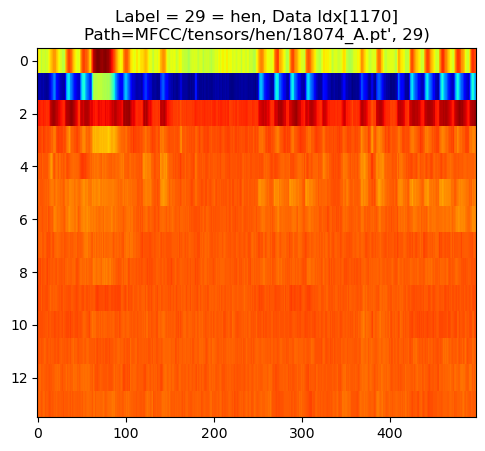

In [205]:
#TODO: Make a nice print of data info about each sample
class_names = my_data_set.classes
_data_iter = iter(train_dataloader)
_data, _label = next(_data_iter)
def plot_mfcc(data,_data_iter = None):
    import matplotlib.pyplot as plt 
    fig = plt.figure()
    size = fig.get_size_inches()*fig.dpi # size in pixels
    print(size)
    plt.imshow(_data.squeeze().transpose(0,1), cmap ='jet',aspect=30,interpolation = 'none')
    
    plt.title(f"Label = {_label.item()} = {class_names[_label]}");
    if _data_iter is not None:
        _rnd_idx = _data_iter._sampler_iter.gi_frame.f_locals['idx']
        _sample_idx = _data_iter._dataset.indices[_rnd_idx]
        _path = test_dataset.dataset.samples[_sample_idx]
        plt.title(f"Label = {_label.item()} = {class_names[_label]}, Data Idx[{_sample_idx}]\nPath={str(_path).split('/',6)[6]}");
        
        

plot_mfcc(_data,_data_iter)

In [80]:
print_data_loader(test_dataloader,5)

#    | Data Shape:[c,  t,   w]  | Label Shape     | Data DataType | Data Label OG | Data Label Py | Data Label           | Data Path + Label PyTorch Value                              | Label Type             | 
1    | torch.Size([1, 498, 14]) | torch.Size([1]) | torch.float32 | tensor(47)    | tensor([0])   | airplane             | MFCC/tensors/airplane/115387_A.pt', 0)                       | <class 'torch.Tensor'> | 
2    | torch.Size([1, 498, 14]) | torch.Size([1]) | torch.float32 | tensor(40)    | tensor([28])  | helicopter           | MFCC/tensors/helicopter/181071_A.pt', 28)                    | <class 'torch.Tensor'> | 
3    | torch.Size([1, 498, 14]) | torch.Size([1]) | torch.float32 | tensor(7)     | tensor([30])  | insects              | MFCC/tensors/insects/191246_B.pt', 30)                       | <class 'torch.Tensor'> | 
4    | torch.Size([1, 498, 14]) | torch.Size([1]) | torch.float32 | tensor(20)    | tensor([17])  | crying_baby          | MFCC/tensors/crying_baby/1872

In [86]:
print_data_loader(train_dataloader,5)

#    | Data Shape:[c,  t,   w]  | Label Shape     | Data DataType | Data Label OG | Data Label Py | Data Label           | Data Path + Label PyTorch Value                              | Label Type             | 
1    | torch.Size([1, 498, 14]) | torch.Size([1]) | torch.float32 | tensor(43)    | tensor([4])   | car_horn             | MFCC/tensors/car_horn/128465_A.pt', 4)                       | <class 'torch.Tensor'> | 
2    | torch.Size([1, 498, 14]) | torch.Size([1]) | torch.float32 | tensor(39)    | tensor([26])  | glass_breaking       | MFCC/tensors/glass_breaking/216281_A.pt', 26)                | <class 'torch.Tensor'> | 
3    | torch.Size([1, 498, 14]) | torch.Size([1]) | torch.float32 | tensor(42)    | tensor([40])  | siren                | MFCC/tensors/siren/54084_A.pt', 40)                          | <class 'torch.Tensor'> | 
4    | torch.Size([1, 498, 14]) | torch.Size([1]) | torch.float32 | tensor(11)    | tensor([38])  | sea_waves            | MFCC/tensors/sea_waves/133863